In [1]:
import numpy as np

import pandas as pd

import xarray as xr

import glob

import matplotlib as mpl

import matplotlib.pyplot as plt

import math as mt

import cartopy.crs as ccrs

import cartopy.feature as cfeature

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


In [2]:
import cftime

In [3]:
esm_ta = xr.open_dataset('../../../Data/ESM/tlev/ta_day_IITM-ESM_historical_r1i1p1f1_gn_19750101-19791231.nc')

In [4]:
ta = esm_ta.ta.copy()

In [5]:
esm_ta.coords
esm_ta.data_vars
esm_ta.plev

<xarray.DataArray 'plev' (plev: 8)>
array([100000.,  85000.,  70000.,  50000.,  25000.,  10000.,   5000.,   1000.])
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
Attributes:
    units:          Pa
    axis:           Z
    positive:       down
    long_name:      pressure
    standard_name:  air_pressure

In [6]:
esm_ta.ta.sel(time=slice('1979-12-01', '1979-12-31')).mean(dim='time')


<xarray.DataArray 'ta' (plev: 8, lat: 94, lon: 192)>
array([[[244.07904, 244.07672, 244.07448, ..., 244.08955, 244.08606,
         244.08257],
        [243.82198, 243.8155 , 243.80908, ..., 243.85013, 243.84074,
         243.83134],
        [243.54341, 243.53119, 243.51895, ..., 243.59515, 243.57793,
         243.56067],
        ...,
        [207.23286, 207.27629, 207.31973, ..., 207.2127 , 207.2194 ,
         207.22614],
        [209.00671, 209.03816, 209.06967, ..., 208.9864 , 208.99321,
         208.99995],
        [210.96764, 210.98247, 210.99734, ..., 210.95659, 210.96027,
         210.9639 ]],

       [[237.75964, 237.75664, 237.75357, ..., 237.77248, 237.7682 ,
         237.76395],
        [237.47792, 237.46848, 237.45903, ..., 237.51144, 237.50029,
         237.4891 ],
        [237.20215, 237.18378, 237.16544, ..., 237.26346, 237.24301,
         237.22258],
...
        [216.8213 , 216.79495, 216.7686 , ..., 216.95538, 216.91068,
         216.86595],
        [217.81458, 217.79471, 217.7748 , ..., 217.90955, 217.87793,
         217.84622],
        [218.83484, 218.82402, 218.8132 , ..., 218.88297, 218.86691,
         218.85088]],

       [[220.10535, 220.11395, 220.12253, ..., 220.0698 , 220.08182,
         220.0937 ],
        [220.59328, 220.61201, 220.6307 , ..., 220.5163 , 220.54195,
         220.56757],
        [220.90532, 220.93307, 220.96085, ..., 220.7993 , 220.83461,
         220.87   ],
        ...,
        [220.16444, 220.13034, 220.09616, ..., 220.31392, 220.2641 ,
         220.21426],
        [220.99301, 220.97038, 220.94775, ..., 221.08635, 221.0552 ,
         221.02414],
        [221.70717, 221.69643, 221.68567, ..., 221.74973, 221.73553,
         221.72136]]], dtype=float32)
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -88.54 -86.65 -84.75 -82.85 ... 84.75 86.65 88.54
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

# plotting function

In [7]:
def map_plot(ax1):
    ax1.coastlines()
    ax1.set_xticks([-180, -120, -60,0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


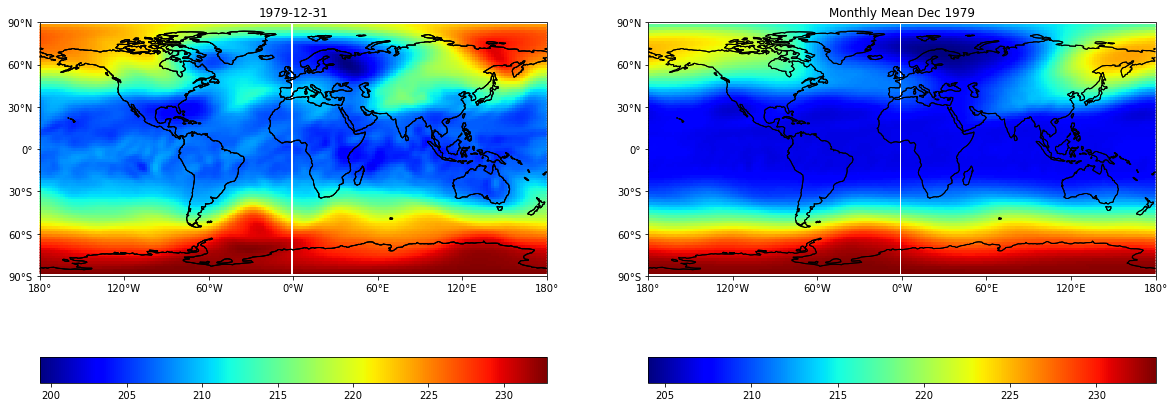

In [8]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())
m1=ax1.pcolor(ta.lon.values,ta.lat.values,ta[1825,4,:,:],transform=ccrs.PlateCarree(),cmap='jet')
map_plot(ax1)
fig.colorbar(m1,orientation='horizontal')
ax1.coastlines()
plt.title('1979-12-31')

ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())
m2=ax2.pcolor(ta.lon.values,ta.lat.values,esm_ta.ta.sel(time=slice('1979-12-01', '1979-12-31')).mean(dim='time')[4,:,:],transform=ccrs.PlateCarree(),cmap='jet')
map_plot(ax2)
ax2.coastlines()
fig.colorbar(m2,orientation='horizontal')
ax1.coastlines()
plt.title('Monthly Mean Dec 1979')

plt.savefig('ESM_ta_250_plots_1979.jpeg',dpi=300)


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


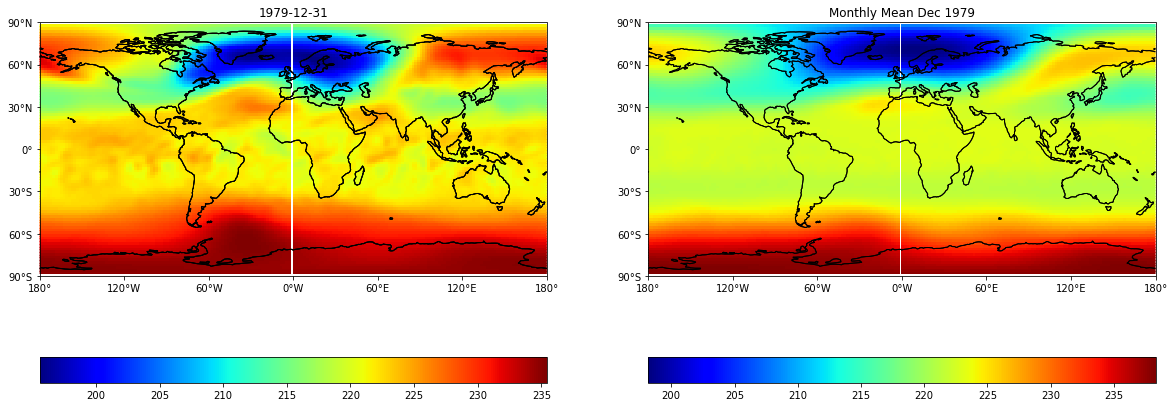

In [11]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())
m1=ax1.pcolor(ta.lon.values,ta.lat.values,ta[1825,1,:,:],transform=ccrs.PlateCarree(),cmap='jet')
map_plot(ax1)
fig.colorbar(m1,orientation='horizontal')
ax1.coastlines()
plt.title('1979-12-31')

ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())
m2=ax2.pcolor(ta.lon.values,ta.lat.values,esm_ta.ta.sel(time=slice('1979-12-01', '1979-12-31')).mean(dim='time')[1,:,:],transform=ccrs.PlateCarree(),cmap='jet')
map_plot(ax2)
ax2.coastlines()
fig.colorbar(m2,orientation='horizontal')
ax1.coastlines()
plt.title('Monthly Mean Dec 1979')

plt.savefig('ESM_ta_850_plots_1979.jpeg',dpi=300)


In [9]:
esm_ta2000 = xr.open_dataset('../../../Data/ESM/tlev/ta_day_IITM-ESM_historical_r1i1p1f1_gn_20000101-20041231.nc')

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


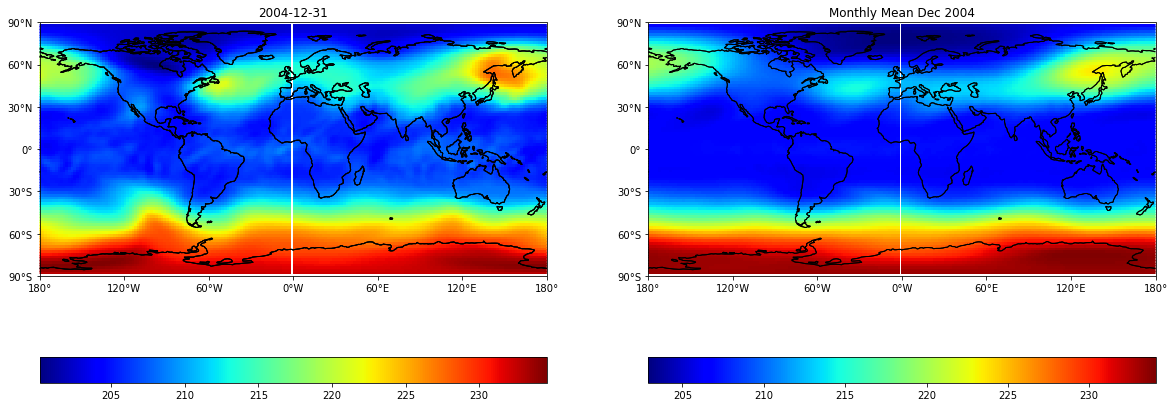

In [10]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())
m1=ax1.pcolor(ta.lon.values,ta.lat.values,esm_ta2000.ta[1825,4,:,:],transform=ccrs.PlateCarree(),cmap='jet')
map_plot(ax1)
fig.colorbar(m1,orientation='horizontal')
ax1.coastlines()
plt.title('2004-12-31')

ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())
m2=ax2.pcolor(ta.lon.values,ta.lat.values,esm_ta2000.ta.sel(time=slice('2004-12-01', '2004-12-31')).mean(dim='time')[4,:,:],transform=ccrs.PlateCarree(),cmap='jet')
map_plot(ax2)
ax2.coastlines()
fig.colorbar(m2,orientation='horizontal')
ax1.coastlines()
plt.title('Monthly Mean Dec 2004')

plt.savefig('ESM_ta_250_plots_2004.jpeg',dpi=300)

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


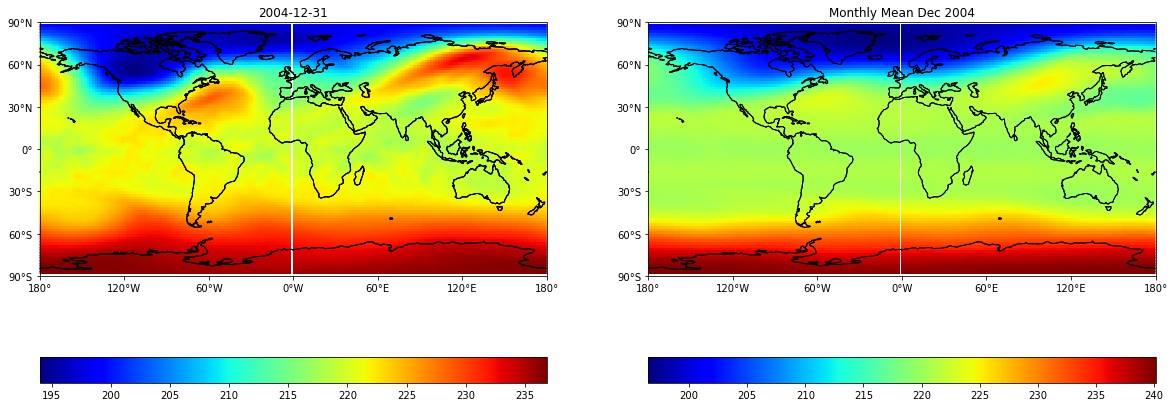

In [12]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())
m1=ax1.pcolor(ta.lon.values,ta.lat.values,esm_ta2000.ta[1825,1,:,:],transform=ccrs.PlateCarree(),cmap='jet')
map_plot(ax1)
fig.colorbar(m1,orientation='horizontal')
ax1.coastlines()
plt.title('2004-12-31')

ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree())
m2=ax2.pcolor(ta.lon.values,ta.lat.values,esm_ta2000.ta.sel(time=slice('2004-12-01', '2004-12-31')).mean(dim='time')[1,:,:],transform=ccrs.PlateCarree(),cmap='jet')
map_plot(ax2)
ax2.coastlines()
fig.colorbar(m2,orientation='horizontal')
ax1.coastlines()
plt.title('Monthly Mean Dec 2004')

plt.savefig('ESM_ta_850_plots_2004.jpeg',dpi=300)